In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
#pip install tensorflow

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import EarlyStopping

In [5]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [6]:
file_name = '/content/gdrive/My Drive/Colab Notebooks/water_data/water_potability.csv'

df = pd.read_csv(file_name)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


As you can see above, the data has three columns with missing values, which are:
1. ph
2. Sulfate
3. Trihalomethanes

In [8]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [9]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


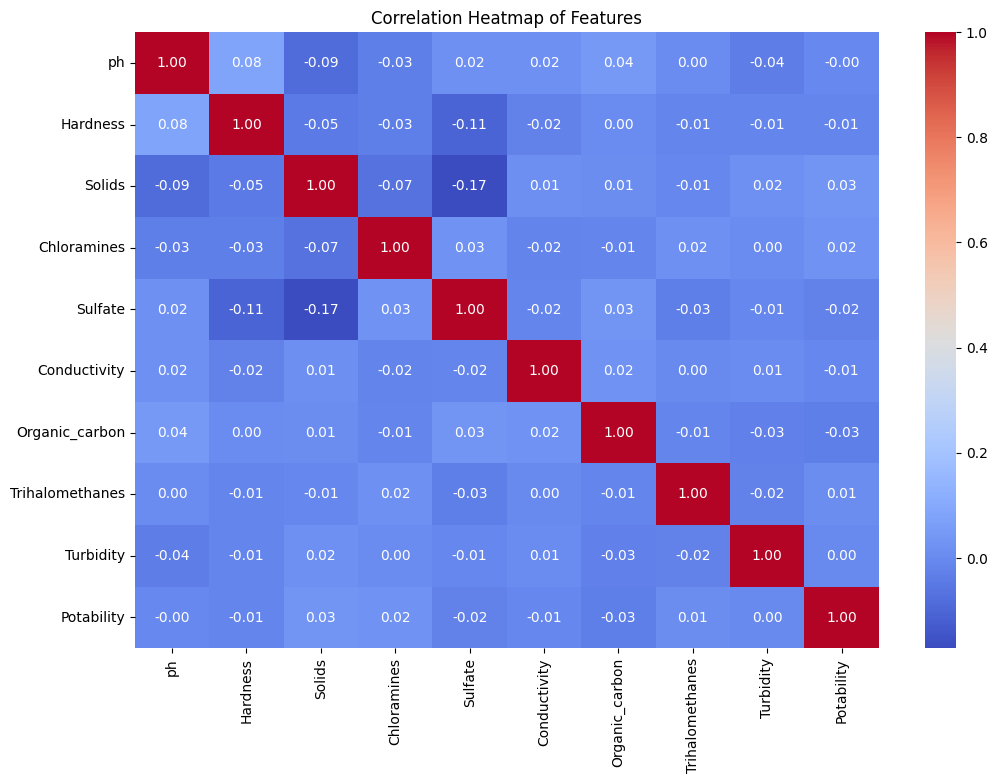

In [10]:
# Making correlation matrix
correlation_matrix = df.corr()

# Creating a heat map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

# A positive correlation is shown in warmer colors (e.g., red), while
# a negative correlation is shown in cooler colors (e.g., blue). A correlation
# close to 1 or -1 indicates a strong relationship, while a value close to 0
# indicates a weak or no relationship.

In [11]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Potability', diag_kind='kde')
plt.title('Relationship between different features')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

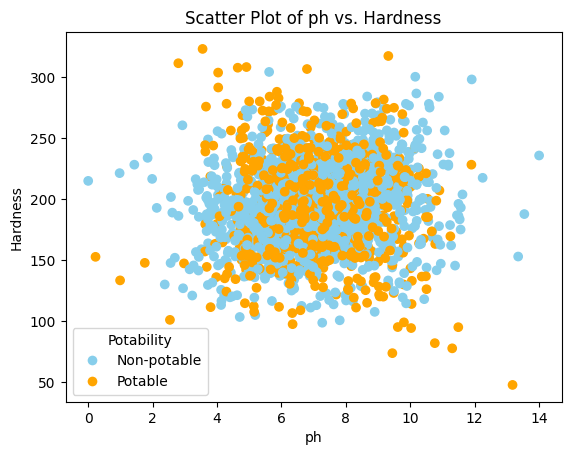

In [12]:
# Expanding a scatter plot of ph and hardness
colors = {0: 'skyblue', 1: 'orange'}

plt.scatter(df['ph'], df['Hardness'], c=df['Potability'].map(colors))
plt.xlabel('ph')
plt.ylabel('Hardness')
plt.title('Scatter Plot of ph vs. Hardness')

legend_labels = {0: 'Non-potable', 1: 'Potable'}
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=8, label=legend_labels[label]) for label in legend_labels]
plt.legend(handles=handles, title='Potability')

plt.show()

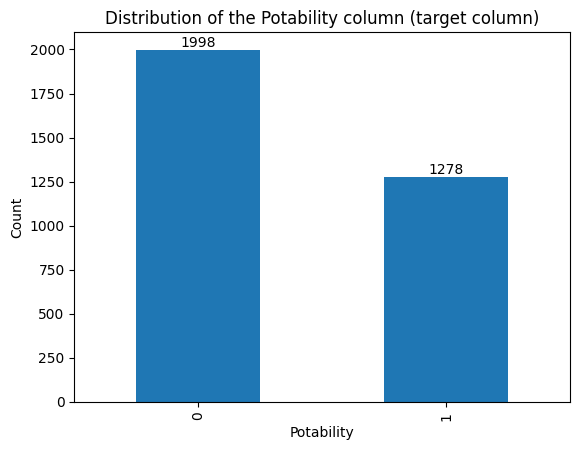

In [15]:
# Checking the balance of the two classes

df['Potability'].value_counts().plot(kind='bar')

value_counts = df['Potability'].value_counts()
for index, value in enumerate(value_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Potability')
plt.ylabel('Count')
plt.title('Distribution of the Potability column (target column)')
plt.show()

As you can see above, the classes are very much imbalanced.

# Dropping NaN values

In [16]:
#not containing NaN values
df_non = df.dropna(axis=0, how='any', inplace=False)

In [17]:
df_non.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


In [19]:
X = df_non.drop('Potability', axis=1)
y = df_non['Potability']

In [20]:
#Hyperparameters for Grid Search in Logistic Regression
LR_params={
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'newton-cg'],
    'penalty': ['None', 'l1', 'l2']
}

model_LR = GridSearchCV(LogisticRegression(random_state = 42), LR_params, cv=3)

In [21]:
#For evaluating Logistic Regression, Decision Tree and Random Forest
def evaluate_model(model, X_t, y_t):
    # Make predictions
    y_pred_model = model.predict(X_t)

    # Evaluate the model
    accuracy = accuracy_score(y_t, y_pred_model)
    confusion = confusion_matrix(y_t, y_pred_model)
    report = classification_report(y_t, y_pred_model, zero_division=0)

    y_scores = model.predict_proba(X_t)[:, 1]  # Probability scores for the positive class
    fpr, tpr, thresholds = roc_curve(y_t, y_scores)

    print(f'Accuracy: {accuracy}')
    print('Confusion Matrix:')
    print(confusion)
    print('Classification Report:')
    print(report)

    print('ROC Curve:')
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    print("Area under the curve:")
    roc_auc = roc_auc_score(y_t, y_scores)
    print(f'{roc_auc:.2f}')

Accuracy: 0.5732009925558312
Confusion Matrix:
[[231   0]
 [172   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       231
           1       0.00      0.00      0.00       172

    accuracy                           0.57       403
   macro avg       0.29      0.50      0.36       403
weighted avg       0.33      0.57      0.42       403

ROC Curve:


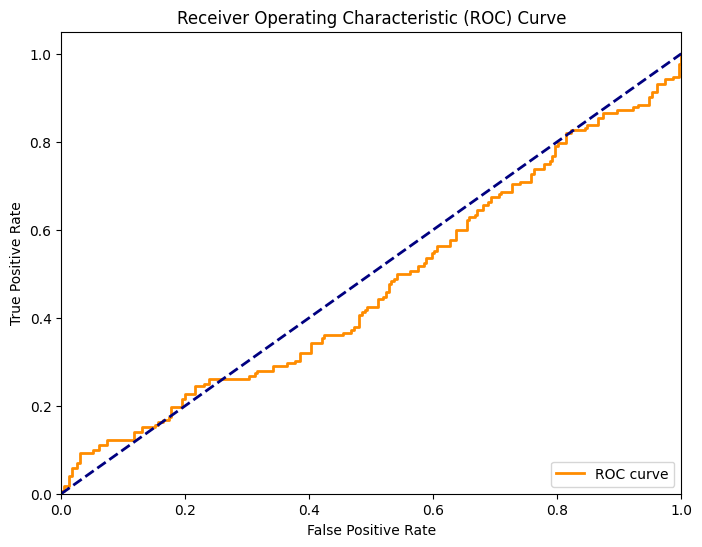

Area under the curve:
0.47


In [22]:
# Split the dataset into 80:20 ratio of train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

# Train a Logistic Regression model
model_LR.fit(X_train, y_train)

evaluate_model(model_LR, X_test, y_test)

Accuracy: 0.5955334987593052
Confusion Matrix:
[[240   0]
 [163   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       240
           1       0.00      0.00      0.00       163

    accuracy                           0.60       403
   macro avg       0.30      0.50      0.37       403
weighted avg       0.35      0.60      0.44       403

ROC Curve:


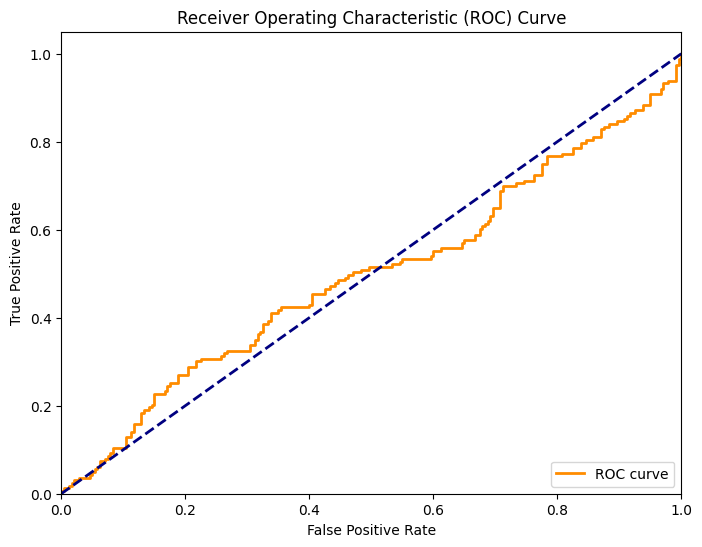

Area under the curve:
0.50


In [23]:
# Use stratified sampling so that the train test split classes ratio represent the actual dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

model_LR.fit(X_train, y_train)

evaluate_model(model_LR, X_test, y_test)

As you can see above, using stratified sampling increased the accuracy by 3.9%

# Now adding the median values instead of NaN values - Data Imputation

In [24]:
# Handle missing values by filling with the median value of each column
df.fillna(df.median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [25]:
# Split the dataset into features (X) and target labels (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

Accuracy: 0.6097560975609756
Confusion Matrix:
[[400   0]
 [256   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656

ROC Curve:


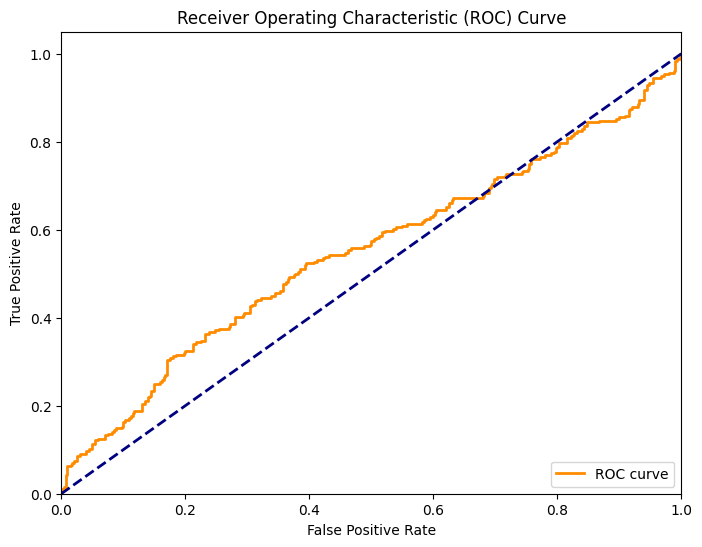

Area under the curve:
0.55


In [26]:
# Use stratified sampling so that the train test split values represent the actual dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

model_LR.fit(X_train, y_train)

evaluate_model(model_LR, X_test, y_test)

Using data imputation and stratified sampling, achieved best possible results (accuracy and ROC curve) for this not linearly separable problem.

Since precision, recall and F-score are 0, now we would use those algorithms which are fit for our not linearly separable problem along with stratified sampling and data imputation.

# Algorithms for non linearly separable problem

In [37]:
#Hyperparameters for Grid Search in Decision Tree
DT_params={
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 3, 5, 10],
    'criterion': ['gini', 'entropy']
}

model_DT = GridSearchCV(DecisionTreeClassifier(random_state = 42), DT_params, cv=3)

In [129]:
#Hyperparameters for Grid Search in Random Forest
RF_params={
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 3, 5, 10],
    'criterion': ['gini', 'entropy']
}

model_RF = GridSearchCV(RandomForestClassifier(random_state = 42), RF_params, cv=3)

In [58]:
#For evaluating Neural Network model
def evaluate_NN(model, X_t, y_t):
    test_loss, test_accuracy = model.evaluate(X_t, y_t)

    print("Test Loss", test_loss)
    print("Test Accuracy", test_accuracy)

    # Predict probabilities for the test set
    y_probab = model.predict(X_t)

    # Convert predicted probabilities to binary predictions (0 or 1) based on a threshold (e.g., 0.5)
    y_p = (y_probab >= 0.5).astype(int)

    conf_matrix = confusion_matrix(y_t, y_p)
    print("Confusion Matrix:\n", conf_matrix)

    class_report = classification_report(y_t, y_p)
    print("Classification Report:\n", class_report)

    fpr, tpr, thresholds = roc_curve(y_t, y_probab)
    roc_auc = roc_auc_score(y_t, y_probab)
    print("ROC AUC Score:", roc_auc)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

## Decision Tree

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [131]:
# Split the dataset into features (X) and target labels (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

Accuracy: 0.6310975609756098
Confusion Matrix:
[[359  41]
 [201  55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.90      0.75       400
           1       0.57      0.21      0.31       256

    accuracy                           0.63       656
   macro avg       0.61      0.56      0.53       656
weighted avg       0.61      0.63      0.58       656

ROC Curve:


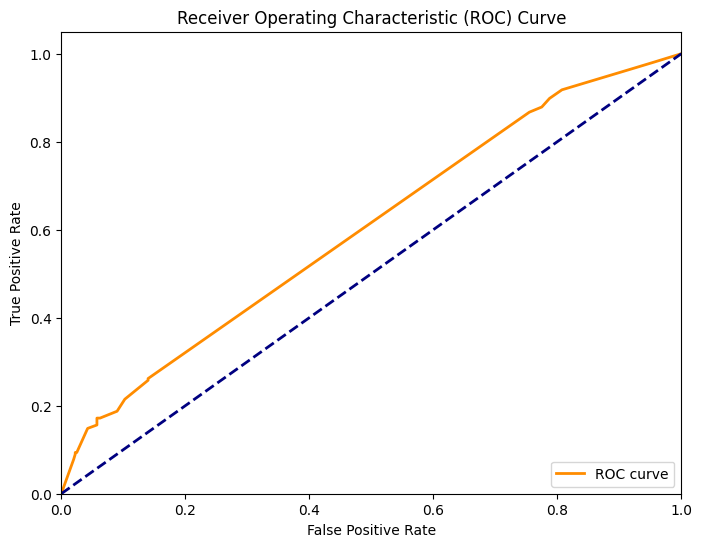

Area under the curve:
0.60


In [31]:
# Split the dataset into 80:20 ratio of train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

# Train a Decision Tree model
model_DT.fit(X_train, y_train)

evaluate_model(model_DT, X_test, y_test)

## Random Forest

Accuracy: 0.6554878048780488
Confusion Matrix:
[[376  24]
 [202  54]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.94      0.77       400
           1       0.69      0.21      0.32       256

    accuracy                           0.66       656
   macro avg       0.67      0.58      0.55       656
weighted avg       0.67      0.66      0.60       656

ROC Curve:


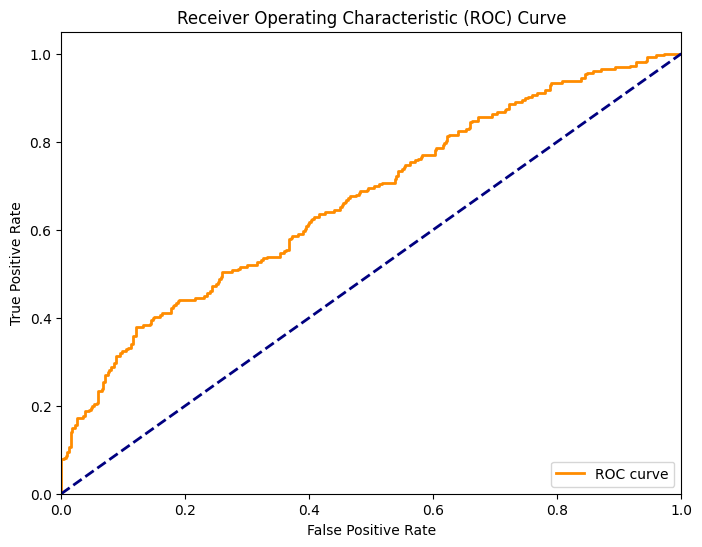

Area under the curve:
0.67


In [132]:
# Split the dataset into 80:20 ratio of train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest model
model_RF.fit(X_train, y_train)

evaluate_model(model_RF, X_test, y_test)

## Neural Network

In [94]:
epochs = 50
batch_size = 32
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 7)

In [95]:
# Splitting dataset into training, validation and test sets in the ratio 80-10-10
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [96]:
# Defining the model with number of layers, units, and activation function
ANN_model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(9,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(48, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

In [97]:
ANN_model.compile(optimizer='adam',
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

In [98]:
ANN_history = ANN_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks = [early_stopping])

Epoch 1/50
64/64 [==============================] - 1s 5ms/step - loss: 29.0234 - accuracy: 0.4932 - val_loss: 44.4919 - val_accuracy: 0.5000
Epoch 2/50
64/64 [==============================] - 0s 3ms/step - loss: 26.5330 - accuracy: 0.5068 - val_loss: 24.7868 - val_accuracy: 0.5000
Epoch 3/50
64/64 [==============================] - 0s 3ms/step - loss: 14.8495 - accuracy: 0.5005 - val_loss: 6.2472 - val_accuracy: 0.5000
Epoch 4/50
64/64 [==============================] - 0s 3ms/step - loss: 13.2524 - accuracy: 0.4843 - val_loss: 2.1308 - val_accuracy: 0.4688
Epoch 5/50
64/64 [==============================] - 0s 3ms/step - loss: 9.4886 - accuracy: 0.4907 - val_loss: 19.7014 - val_accuracy: 0.5000
Epoch 6/50
64/64 [==============================] - 0s 3ms/step - loss: 11.4980 - accuracy: 0.5093 - val_loss: 8.8741 - val_accuracy: 0.5000
Epoch 7/50
64/64 [==============================] - 0s 3ms/step - loss: 8.2934 - accuracy: 0.5103 - val_loss: 10.1870 - val_accuracy: 0.5000
Epoch 8/50


8/8 [==============================] - 0s 3ms/step - loss: 14.8056 - accuracy: 0.5000
Test Loss 14.805638313293457
Test Accuracy 0.5
8/8 [==============================] - 0s 2ms/step
Confusion Matrix:
 [[128   0]
 [128   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67       128
           1       0.00      0.00      0.00       128

    accuracy                           0.50       256
   macro avg       0.25      0.50      0.33       256
weighted avg       0.25      0.50      0.33       256

ROC AUC Score: 0.45819091796875


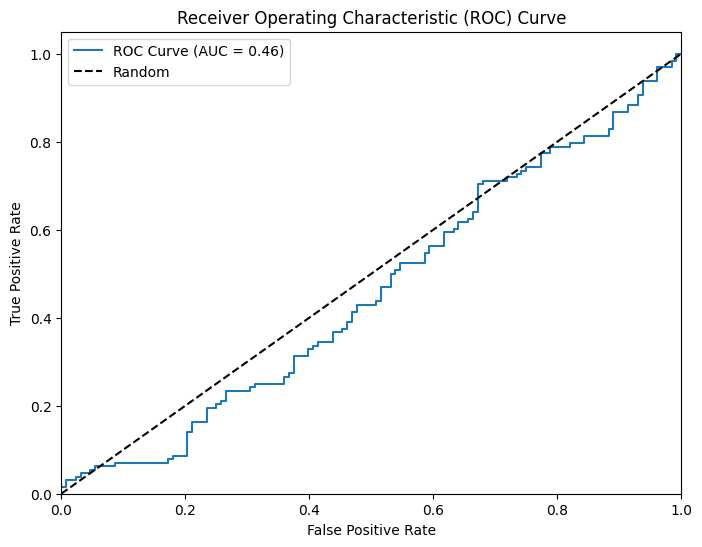

In [99]:
evaluate_NN(ANN_model, X_test, y_test)

In [48]:
X_test.shape[0]

328

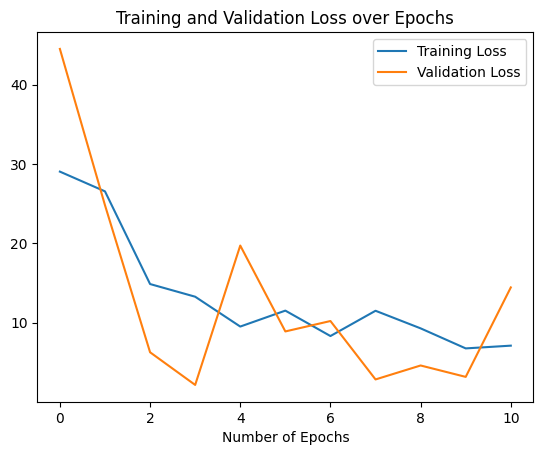

In [100]:
plt.title('Training and Validation Loss over Epochs')

plt.xlabel('Number of Epochs')

plt.plot(ANN_history.history['loss'], label='Training Loss')
plt.plot(ANN_history.history['val_loss'], label='Validation Loss')

plt.legend()
plt.show()

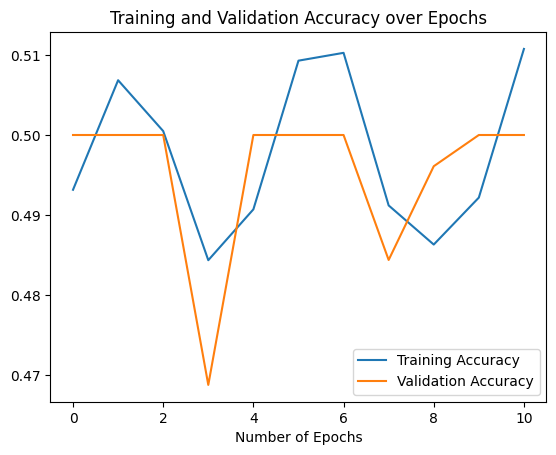

In [101]:
plt.title('Training and Validation Accuracy over Epochs')

plt.xlabel('Number of Epochs')

plt.plot(ANN_history.history['accuracy'], label='Training Accuracy')
plt.plot(ANN_history.history['val_accuracy'], label='Validation Accuracy')

plt.legend()
plt.show()

# Trying to use Decision Tree, Random Forest and Neural Networks algorithms with balanced data

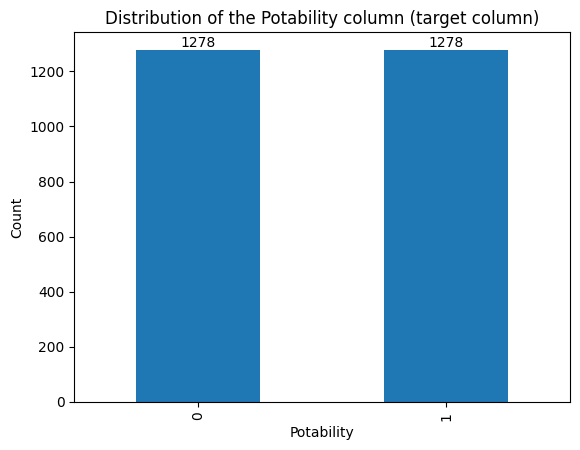

In [67]:
min_ratio = df['Potability'].value_counts().min()

df_0 = df[df['Potability'] == 0].sample(min_ratio, replace = True)
df_1 = df[df['Potability'] == 1]
df_balanced = pd.concat([df_0, df_1])

df_balanced['Potability'].value_counts().plot(kind = 'bar')

value_counts = df_balanced['Potability'].value_counts()
for index, value in enumerate(value_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel('Potability')
plt.ylabel('Count')
plt.title('Distribution of the Potability column (target column)')
plt.show()

In [68]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2556 entries, 945 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2556 non-null   float64
 1   Hardness         2556 non-null   float64
 2   Solids           2556 non-null   float64
 3   Chloramines      2556 non-null   float64
 4   Sulfate          2556 non-null   float64
 5   Conductivity     2556 non-null   float64
 6   Organic_carbon   2556 non-null   float64
 7   Trihalomethanes  2556 non-null   float64
 8   Turbidity        2556 non-null   float64
 9   Potability       2556 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 219.7 KB


##Decision Tree

Accuracy: 0.578125
Confusion Matrix:
[[180  76]
 [140 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.70      0.62       256
           1       0.60      0.45      0.52       256

    accuracy                           0.58       512
   macro avg       0.58      0.58      0.57       512
weighted avg       0.58      0.58      0.57       512

ROC Curve:


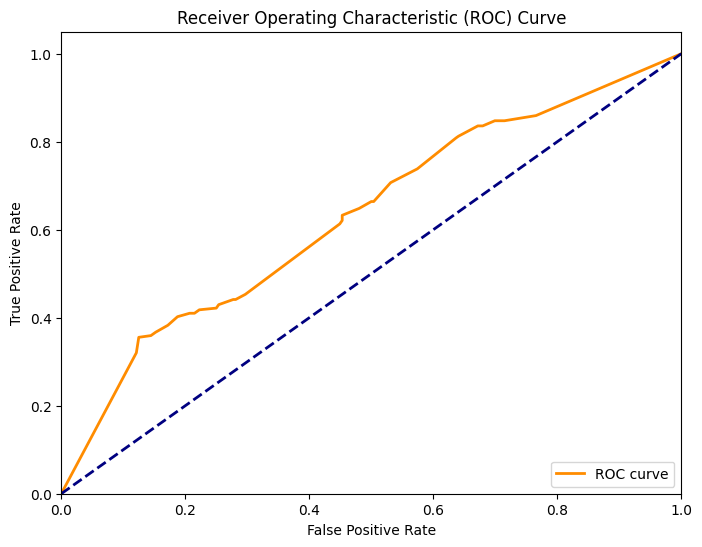

Area under the curve:
0.63


In [69]:
# Split the dataset into features (X) and target labels (y)
X = df_balanced.drop('Potability', axis=1)
y = df_balanced['Potability']

# Split the dataset into 80:20 ratio of train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

# Train a Decision Tree model
model_DT.fit(X_train, y_train)

evaluate_model(model_DT, X_test, y_test)

## Random Forest

Accuracy: 0.681640625
Confusion Matrix:
[[202  54]
 [109 147]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.79      0.71       256
           1       0.73      0.57      0.64       256

    accuracy                           0.68       512
   macro avg       0.69      0.68      0.68       512
weighted avg       0.69      0.68      0.68       512

ROC Curve:


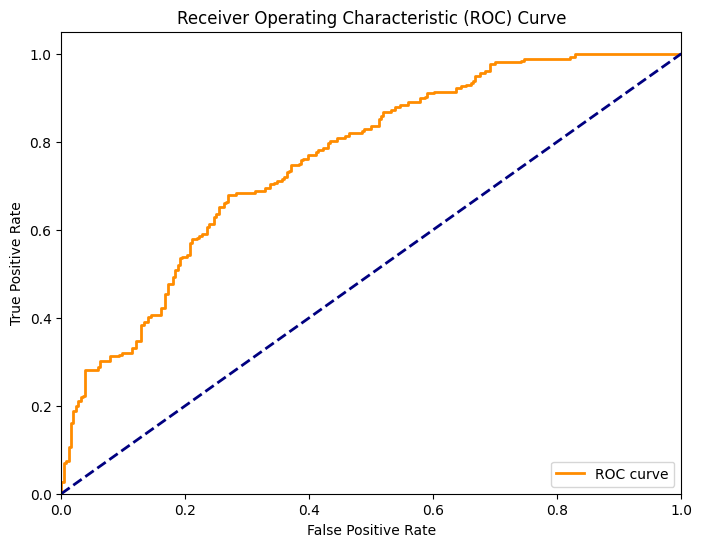

Area under the curve:
0.76


In [133]:
# Split the dataset into features (X) and target labels (y)
X = df_balanced.drop('Potability', axis=1)
y = df_balanced['Potability']

# Split the dataset into 80:20 ratio of train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest model
model_RF.fit(X_train, y_train)

evaluate_model(model_RF, X_test, y_test)

##Neural Network

In [102]:
# Split the dataset into features (X) and target labels (y)
X = df_balanced.drop('Potability', axis=1)
y = df_balanced['Potability']

# Splitting dataset into training, validation and test sets in the ratio 80-10-10
X_train, X_temp, y_train, y_temp = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [103]:
# Defining the model with number of layers, units, and activation function
ANN_model2 = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(9,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(48, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

In [104]:
ANN_model2.compile(optimizer='adam',
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

In [105]:
ANN_history2 = ANN_model2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks = [early_stopping])

Epoch 1/50
64/64 [==============================] - 2s 6ms/step - loss: 44.4933 - accuracy: 0.5308 - val_loss: 3.7297 - val_accuracy: 0.4805
Epoch 2/50
64/64 [==============================] - 0s 3ms/step - loss: 15.4582 - accuracy: 0.5029 - val_loss: 3.2741 - val_accuracy: 0.4844
Epoch 3/50
64/64 [==============================] - 0s 3ms/step - loss: 36.1280 - accuracy: 0.4990 - val_loss: 44.2049 - val_accuracy: 0.5000
Epoch 4/50
64/64 [==============================] - 0s 3ms/step - loss: 29.0963 - accuracy: 0.4843 - val_loss: 18.4689 - val_accuracy: 0.5000
Epoch 5/50
64/64 [==============================] - 0s 3ms/step - loss: 15.7498 - accuracy: 0.4985 - val_loss: 2.6054 - val_accuracy: 0.4883
Epoch 6/50
64/64 [==============================] - 0s 3ms/step - loss: 11.8015 - accuracy: 0.4941 - val_loss: 9.8625 - val_accuracy: 0.5000
Epoch 7/50
64/64 [==============================] - 0s 3ms/step - loss: 10.8925 - accuracy: 0.4907 - val_loss: 8.2784 - val_accuracy: 0.5000
Epoch 8/50


8/8 [==============================] - 0s 3ms/step - loss: 2.8301 - accuracy: 0.5078
Test Loss 2.8300933837890625
Test Accuracy 0.5078125
8/8 [==============================] - 0s 3ms/step
Confusion Matrix:
 [[126   2]
 [124   4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.98      0.67       128
           1       0.67      0.03      0.06       128

    accuracy                           0.51       256
   macro avg       0.59      0.51      0.36       256
weighted avg       0.59      0.51      0.36       256

ROC AUC Score: 0.48126220703125


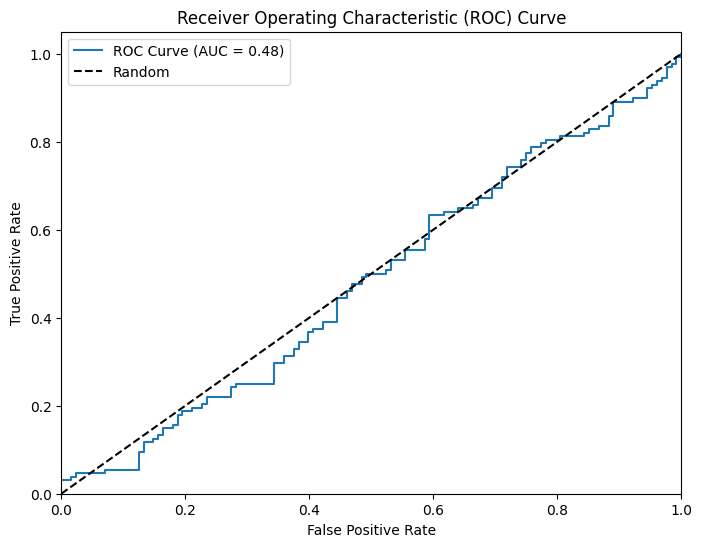

In [106]:
evaluate_NN(ANN_model2, X_test, y_test)

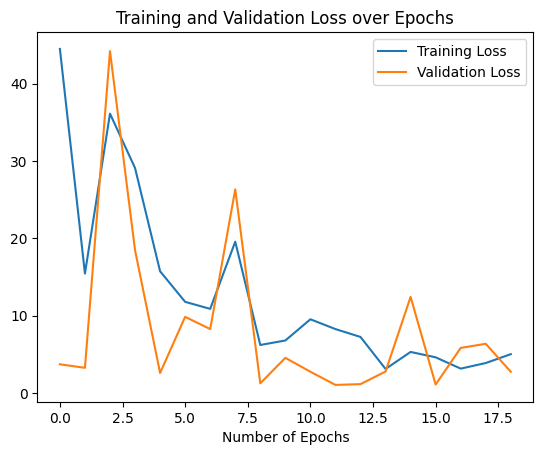

In [107]:
plt.title('Training and Validation Loss over Epochs')

plt.xlabel('Number of Epochs')

plt.plot(ANN_history2.history['loss'], label='Training Loss')
plt.plot(ANN_history2.history['val_loss'], label='Validation Loss')

plt.legend()
plt.show()

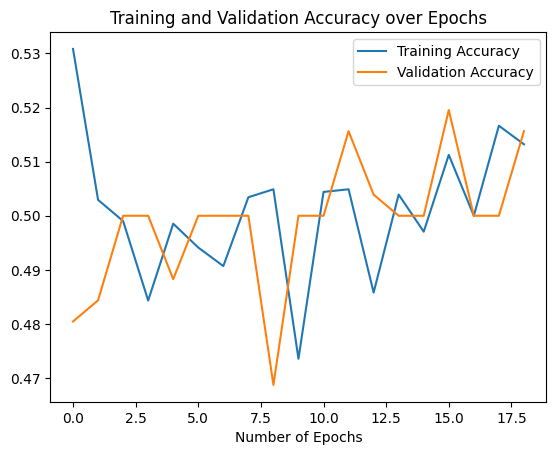

In [108]:
plt.title('Training and Validation Accuracy over Epochs')

plt.xlabel('Number of Epochs')

plt.plot(ANN_history2.history['accuracy'], label='Training Accuracy')
plt.plot(ANN_history2.history['val_accuracy'], label='Validation Accuracy')

plt.legend()
plt.show()

#Feature Scaling for Neural Network

Feature Scaling:

Tree based algorithms don't require feature scaling. So I tried scaling before running neural network.
I have used two types of scaling on the balanced dataset:
1. Min Max Scaling
2. Z-score Scaling

##Min Max Scaling

In [109]:
# Split the dataset into features (X) and target labels (y)
X = df_balanced.drop('Potability', axis=1)
y = df_balanced['Potability']

In [110]:
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

In [111]:
# Splitting dataset into training, validation and test sets in the ratio 80-10-10
X_train, X_temp, y_train, y_temp = train_test_split(X_minmax, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [112]:
# Defining the model with number of layers, units, and activation function
ANN_model_minmax = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(9,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(48, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

In [113]:
ANN_model_minmax.compile(optimizer='adam',
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

In [114]:
ANN_history_minmax = ANN_model_minmax.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks = [early_stopping])

Epoch 1/50
64/64 [==============================] - 1s 5ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6928 - val_accuracy: 0.5039
Epoch 2/50
64/64 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5054 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 3/50
64/64 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5068 - val_loss: 0.6908 - val_accuracy: 0.5547
Epoch 4/50
64/64 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.5259 - val_loss: 0.6918 - val_accuracy: 0.5195
Epoch 5/50
64/64 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5333 - val_loss: 0.6867 - val_accuracy: 0.5742
Epoch 6/50
64/64 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 0.5450 - val_loss: 0.6856 - val_accuracy: 0.5273
Epoch 7/50
64/64 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.5719 - val_loss: 0.6644 - val_accuracy: 0.6055
Epoch 8/50
64/64 [==

8/8 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.5703
Test Loss 0.657522439956665
Test Accuracy 0.5703125
8/8 [==============================] - 0s 2ms/step
Confusion Matrix:
 [[67 61]
 [49 79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.52      0.55       128
           1       0.56      0.62      0.59       128

    accuracy                           0.57       256
   macro avg       0.57      0.57      0.57       256
weighted avg       0.57      0.57      0.57       256

ROC AUC Score: 0.6474609375


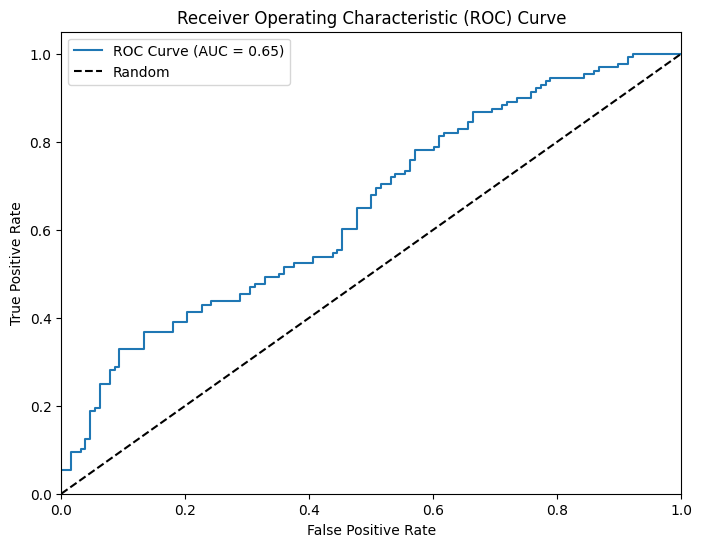

In [115]:
evaluate_NN(ANN_model_minmax, X_test, y_test)

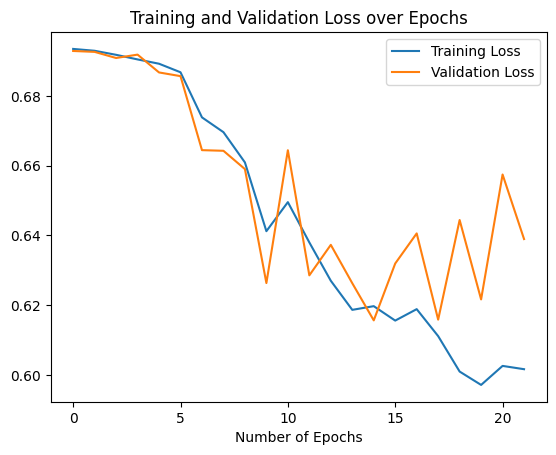

In [116]:
plt.title('Training and Validation Loss over Epochs')

plt.xlabel('Number of Epochs')

plt.plot(ANN_history_minmax.history['loss'], label='Training Loss')
plt.plot(ANN_history_minmax.history['val_loss'], label='Validation Loss')

plt.legend()
plt.show()

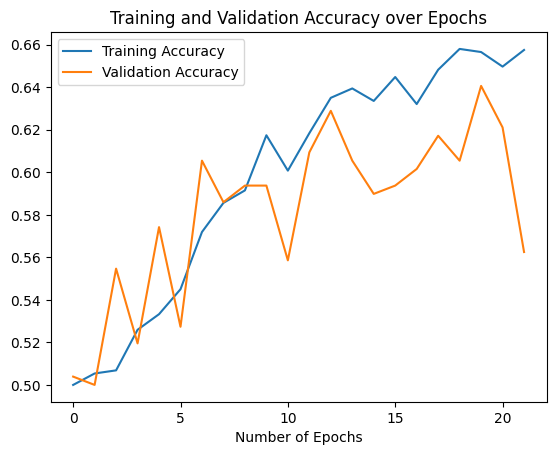

In [117]:
plt.title('Training and Validation Accuracy over Epochs')

plt.xlabel('Number of Epochs')

plt.plot(ANN_history_minmax.history['accuracy'], label='Training Accuracy')
plt.plot(ANN_history_minmax.history['val_accuracy'], label='Validation Accuracy')

plt.legend()
plt.show()

##Z-score Scaling

In [118]:
# Split the dataset into features (X) and target labels (y)
X = df_balanced.drop('Potability', axis=1)
y = df_balanced['Potability']

In [119]:
# Scale the features using Min-Max scaling
scaler = StandardScaler()
X_z = scaler.fit_transform(X)

In [120]:
# Splitting dataset into training, validation and test sets in the ratio 80-10-10
X_train, X_temp, y_train, y_temp = train_test_split(X_z, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [121]:
# Defining the model with number of layers, units, and activation function
ANN_model_z = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(9,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(48, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

In [122]:
ANN_model_z.compile(optimizer='adam',
              loss='binary_crossentropy',  # For binary classification
              metrics=['accuracy'])

In [123]:
ANN_history_z = ANN_model_z.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val), callbacks = [early_stopping])

Epoch 1/50
64/64 [==============================] - 2s 9ms/step - loss: 0.6814 - accuracy: 0.5445 - val_loss: 0.6724 - val_accuracy: 0.5469
Epoch 2/50
64/64 [==============================] - 0s 4ms/step - loss: 0.6341 - accuracy: 0.6443 - val_loss: 0.6317 - val_accuracy: 0.6484
Epoch 3/50
64/64 [==============================] - 0s 4ms/step - loss: 0.5985 - accuracy: 0.6786 - val_loss: 0.6400 - val_accuracy: 0.6016
Epoch 4/50
64/64 [==============================] - 0s 4ms/step - loss: 0.5776 - accuracy: 0.6903 - val_loss: 0.6247 - val_accuracy: 0.6367
Epoch 5/50
64/64 [==============================] - 0s 4ms/step - loss: 0.5580 - accuracy: 0.7128 - val_loss: 0.6337 - val_accuracy: 0.6523
Epoch 6/50
64/64 [==============================] - 0s 5ms/step - loss: 0.5468 - accuracy: 0.7109 - val_loss: 0.6661 - val_accuracy: 0.5977
Epoch 7/50
64/64 [==============================] - 0s 4ms/step - loss: 0.5258 - accuracy: 0.7480 - val_loss: 0.6554 - val_accuracy: 0.6406
Epoch 8/50
64/64 [==

8/8 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.6016
Test Loss 0.6949835419654846
Test Accuracy 0.6015625
8/8 [==============================] - 0s 2ms/step
Confusion Matrix:
 [[72 56]
 [46 82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.56      0.59       128
           1       0.59      0.64      0.62       128

    accuracy                           0.60       256
   macro avg       0.60      0.60      0.60       256
weighted avg       0.60      0.60      0.60       256

ROC AUC Score: 0.68988037109375


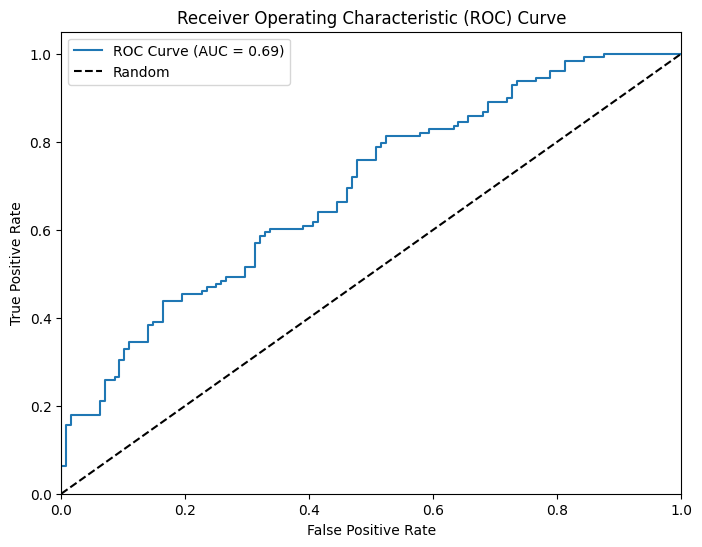

In [124]:
evaluate_NN(ANN_model_z, X_test, y_test)

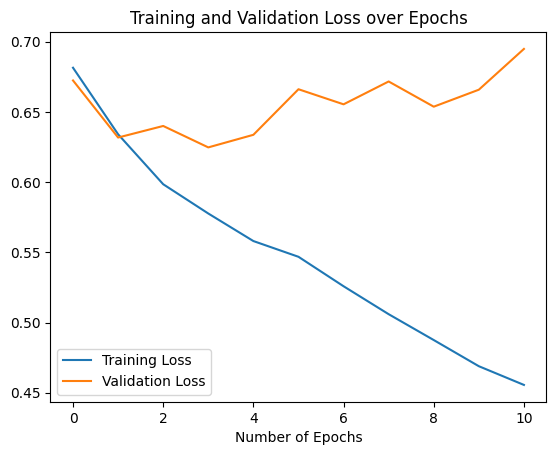

In [125]:
plt.title('Training and Validation Loss over Epochs')

plt.xlabel('Number of Epochs')

plt.plot(ANN_history_z.history['loss'], label='Training Loss')
plt.plot(ANN_history_z.history['val_loss'], label='Validation Loss')

plt.legend()
plt.show()

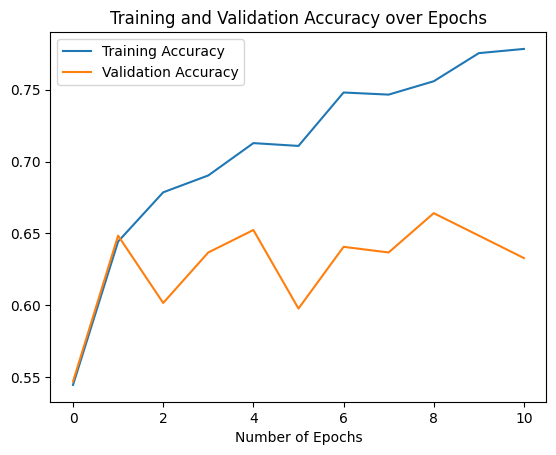

In [126]:
plt.title('Training and Validation Accuracy over Epochs')

plt.xlabel('Number of Epochs')

plt.plot(ANN_history_z.history['accuracy'], label='Training Accuracy')
plt.plot(ANN_history_z.history['val_accuracy'], label='Validation Accuracy')

plt.legend()
plt.show()